In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from Utility_Modified import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD

# SAM

In [3]:
sam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SAM; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.12644 | train_auc: 0.53429 | valid_auc: 0.25    |  0:00:00s
epoch 1  | loss: 2.06388 | train_auc: 0.42286 | valid_auc: 0.25    |  0:00:00s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 2  | loss: 2.59376 | train_auc: 0.42286 | valid_auc: 0.25    |  0:00:00s
epoch 3  | loss: 2.29817 | train_auc: 0.48286 | valid_auc: 0.5     |  0:00:01s
epoch 4  | loss: 2.12082 | train_auc: 0.52571 | valid_auc: 0.75    |  0:00:01s
epoch 5  | loss: 1.52625 | train_auc: 0.51429 | valid_auc: 0.75    |  0:00:01s
epoch 6  | loss: 2.25573 | train_auc: 0.52571 | valid_auc: 0.75    |  0:00:01s
epoch 7  | loss: 1.78555 | train_auc: 0.51143 | valid_auc: 0.75    |  0:00:01s
epoch 8  | loss: 2.02875 | train_auc: 0.51429 | valid_auc: 0.75    |  0:00:02s
epoch 9  | loss: 1.84054 | train_auc: 0.52    | valid_auc: 0.75    |  0:00:02s
epoch 10 | loss: 1.54026 | train_auc: 0.50857 | valid_auc: 1.0     |  0:00:02s
epoch 11 | loss: 1.6343  | train_auc: 0.47429 | valid_auc: 1.0     |  0:00:02s
epoch 12 | loss: 1.76289 | train_auc: 0.45714 | valid_auc: 1.0     |  0:00:02s
epoch 13 | loss: 1.44464 | train_auc: 0.48    | valid_auc: 1.0     |  0:00:02s
epoch 14 | loss: 1.14244 | train_auc: 0.47429 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.14189316643708
Average irrelevant feature importance: 0.08841757129134369
Average random feature importance: 0.11274023831295223
Train AUC score: 0.5085714285714287
Validation AUC score: 1.0
Test AUC score: 0.8333333333333333
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.5


C:\Users\hberg\AppData\Local\Temp\ipykernel_51360\1743350885.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)


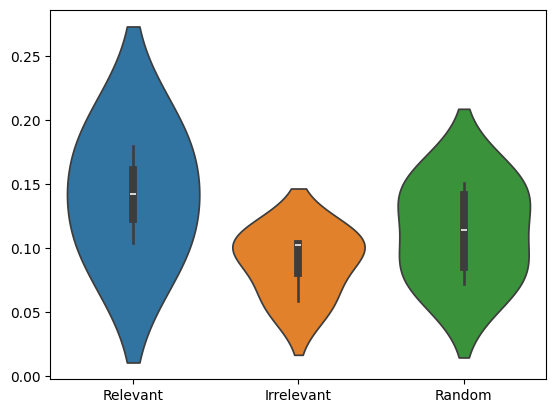

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.17048 | train_auc: 0.50529 | valid_auc: 0.25    |  0:00:00s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 0.84619 | train_auc: 0.51852 | valid_auc: 0.25    |  0:00:00s
epoch 2  | loss: 0.87361 | train_auc: 0.50794 | valid_auc: 0.5     |  0:00:00s
epoch 3  | loss: 0.90786 | train_auc: 0.52116 | valid_auc: 0.5     |  0:00:01s
epoch 4  | loss: 1.00809 | train_auc: 0.42328 | valid_auc: 0.25    |  0:00:01s
epoch 5  | loss: 0.82274 | train_auc: 0.43386 | valid_auc: 0.5     |  0:00:02s
epoch 6  | loss: 1.00756 | train_auc: 0.46296 | valid_auc: 0.5     |  0:00:02s
epoch 7  | loss: 0.87977 | train_auc: 0.45767 | valid_auc: 0.5     |  0:00:02s
epoch 8  | loss: 0.94804 | train_auc: 0.47884 | valid_auc: 0.5     |  0:00:03s
epoch 9  | loss: 0.84564 | train_auc: 0.47884 | valid_auc: 0.5     |  0:00:03s
epoch 10 | loss: 0.90134 | train_auc: 0.48942 | valid_auc: 0.5     |  0:00:03s
epoch 11 | loss: 0.98729 | train_auc: 0.49206 | valid_auc: 0.5     |  0:00:04s
epoch 12 | loss: 0.81285 | train_auc: 0.50529 | valid_auc: 0.5     |  0:00:04s
epoch 13 | loss: 1.0502  | train_auc: 0.52646 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.008281924990698667
Average irrelevant feature importance: 0.012508822129422949
Average random feature importance: 0.008979953213867613
Train AUC score: 0.5132275132275133
Validation AUC score: 1.0
Test AUC score: 0.5833333333333333
False negative rate for relevant features: 0.5652173913043478
False positive rate for irrelevant features: 0.5833333333333334
False positive rate for random features: 0.475


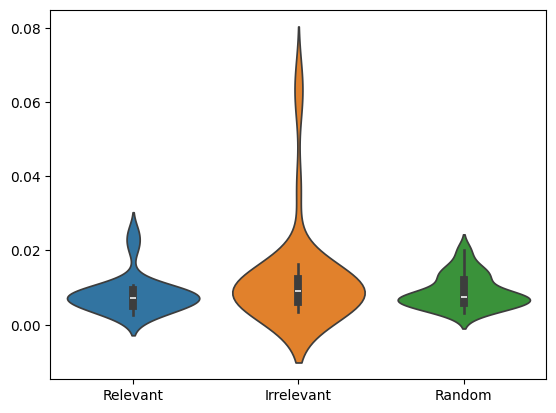

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.9715  | train_auc: 0.52368 | valid_auc: 1.0     |  0:00:01s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 0.85753 | train_auc: 0.57368 | valid_auc: 1.0     |  0:00:02s
epoch 2  | loss: 0.94709 | train_auc: 0.51579 | valid_auc: 1.0     |  0:00:04s
epoch 3  | loss: 1.03034 | train_auc: 0.44737 | valid_auc: 1.0     |  0:00:05s
epoch 4  | loss: 0.97158 | train_auc: 0.41053 | valid_auc: 1.0     |  0:00:07s
epoch 5  | loss: 1.00333 | train_auc: 0.42895 | valid_auc: 1.0     |  0:00:08s
epoch 6  | loss: 1.18173 | train_auc: 0.42632 | valid_auc: 1.0     |  0:00:10s
epoch 7  | loss: 0.91453 | train_auc: 0.44737 | valid_auc: 1.0     |  0:00:11s
epoch 8  | loss: 1.08578 | train_auc: 0.48158 | valid_auc: 1.0     |  0:00:13s
epoch 9  | loss: 0.96782 | train_auc: 0.44474 | valid_auc: 1.0     |  0:00:14s
epoch 10 | loss: 1.30779 | train_auc: 0.45526 | valid_auc: 0.66667 |  0:00:15s
epoch 11 | loss: 1.12034 | train_auc: 0.41053 | valid_auc: 0.33333 |  0:00:17s
epoch 12 | loss: 0.93629 | train_auc: 0.42895 | valid_auc: 0.33333 |  0:00:18s
epoch 13 | loss: 1.10564 | train_auc: 0.43158 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.00043264242568506707
Average irrelevant feature importance: 0.0011213669502805636
Average random feature importance: 0.0008896254444144056
Train AUC score: 0.5236842105263159
Validation AUC score: 1.0
Test AUC score: 0.75
False negative rate for relevant features: 0.55
False positive rate for irrelevant features: 0.516994633273703
False positive rate for random features: 0.48


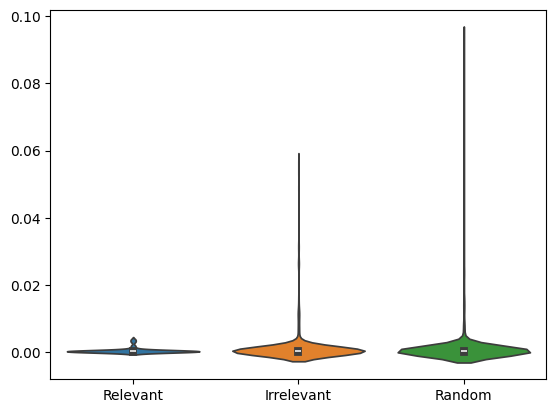

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.06042 | train_auc: 0.42996 | valid_auc: 0.5469  |  0:00:01s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 1.03368 | train_auc: 0.4833  | valid_auc: 0.58297 |  0:00:02s
epoch 2  | loss: 0.95088 | train_auc: 0.55832 | valid_auc: 0.66955 |  0:00:04s
epoch 3  | loss: 0.83812 | train_auc: 0.5627  | valid_auc: 0.69841 |  0:00:05s
epoch 4  | loss: 0.82664 | train_auc: 0.60992 | valid_auc: 0.71429 |  0:00:06s
epoch 5  | loss: 0.73195 | train_auc: 0.64503 | valid_auc: 0.73882 |  0:00:08s
epoch 6  | loss: 0.78907 | train_auc: 0.67577 | valid_auc: 0.72872 |  0:00:09s
epoch 7  | loss: 0.63956 | train_auc: 0.68998 | valid_auc: 0.73882 |  0:00:10s
epoch 8  | loss: 0.67135 | train_auc: 0.73142 | valid_auc: 0.75613 |  0:00:12s
epoch 9  | loss: 0.59145 | train_auc: 0.74339 | valid_auc: 0.75469 |  0:00:13s
epoch 10 | loss: 0.61547 | train_auc: 0.76014 | valid_auc: 0.74459 |  0:00:14s
epoch 11 | loss: 0.59854 | train_auc: 0.79979 | valid_auc: 0.78355 |  0:00:16s
epoch 12 | loss: 0.56394 | train_auc: 0.84174 | valid_auc: 0.78355 |  0:00:17s
epoch 13 | loss: 0.54307 | train_auc: 0.86063 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.20736171746332935
Average irrelevant feature importance: 0.1456135456084847
Average random feature importance: 0.021671939098260637
Train AUC score: 0.9983120874691388
Validation AUC score: 1.0
Test AUC score: 0.98582995951417
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.0


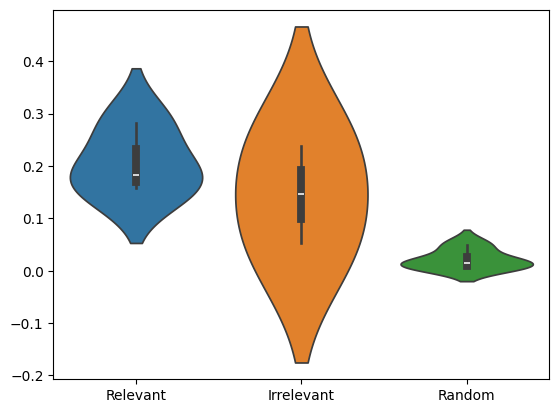

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.01626 | train_auc: 0.46113 | valid_auc: 0.47081 |  0:00:01s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 1.06301 | train_auc: 0.44704 | valid_auc: 0.56273 |  0:00:03s
epoch 2  | loss: 1.01314 | train_auc: 0.45916 | valid_auc: 0.5528  |  0:00:04s
epoch 3  | loss: 1.00345 | train_auc: 0.49822 | valid_auc: 0.44969 |  0:00:06s
epoch 4  | loss: 0.97775 | train_auc: 0.5073  | valid_auc: 0.39006 |  0:00:07s
epoch 5  | loss: 0.8676  | train_auc: 0.46789 | valid_auc: 0.39006 |  0:00:09s
epoch 6  | loss: 0.97867 | train_auc: 0.50312 | valid_auc: 0.44596 |  0:00:11s
epoch 7  | loss: 0.89666 | train_auc: 0.49733 | valid_auc: 0.5205  |  0:00:12s
epoch 8  | loss: 0.89392 | train_auc: 0.49801 | valid_auc: 0.50932 |  0:00:14s
epoch 9  | loss: 0.92113 | train_auc: 0.52759 | valid_auc: 0.50311 |  0:00:15s
epoch 10 | loss: 0.84781 | train_auc: 0.53327 | valid_auc: 0.56273 |  0:00:17s
epoch 11 | loss: 0.87973 | train_auc: 0.52664 | valid_auc: 0.53043 |  0:00:19s
epoch 12 | loss: 0.82773 | train_auc: 0.53815 | valid_auc: 0.54161 |  0:00:20s
epoch 13 | loss: 0.84231 | train_auc: 0.54566 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.011511489102991233
Average irrelevant feature importance: 0.01011461997141495
Average random feature importance: 0.009452344432953619
Train AUC score: 0.5325161637931035
Validation AUC score: 0.7279503105590062
Test AUC score: 0.5086805555555556
False negative rate for relevant features: 0.3888888888888889
False positive rate for irrelevant features: 0.4878048780487805
False positive rate for random features: 0.45


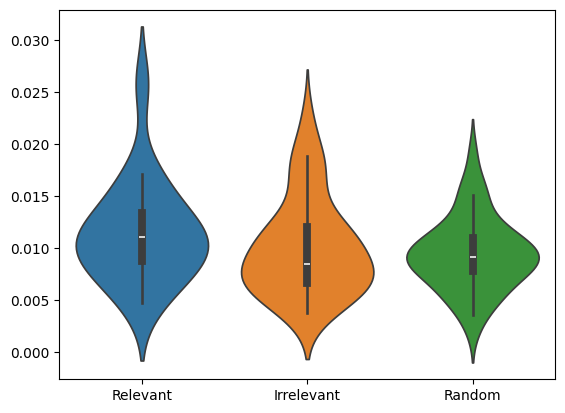

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.53086 | train_auc: 0.37095 | valid_auc: 0.37429 |  0:00:03s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 1.30826 | train_auc: 0.42525 | valid_auc: 0.32    |  0:00:07s
epoch 2  | loss: 1.38606 | train_auc: 0.44258 | valid_auc: 0.30857 |  0:00:10s
epoch 3  | loss: 1.37869 | train_auc: 0.44459 | valid_auc: 0.36857 |  0:00:14s
epoch 4  | loss: 1.48955 | train_auc: 0.41232 | valid_auc: 0.32571 |  0:00:17s
epoch 5  | loss: 1.38378 | train_auc: 0.44911 | valid_auc: 0.26571 |  0:00:21s
epoch 6  | loss: 1.27316 | train_auc: 0.45944 | valid_auc: 0.34286 |  0:00:24s
epoch 7  | loss: 1.33562 | train_auc: 0.45951 | valid_auc: 0.38857 |  0:00:28s
epoch 8  | loss: 1.26198 | train_auc: 0.44477 | valid_auc: 0.42857 |  0:00:31s
epoch 9  | loss: 1.32361 | train_auc: 0.46344 | valid_auc: 0.48571 |  0:00:35s
epoch 10 | loss: 1.30617 | train_auc: 0.46344 | valid_auc: 0.45714 |  0:00:39s
epoch 11 | loss: 1.3334  | train_auc: 0.47309 | valid_auc: 0.54571 |  0:00:42s
epoch 12 | loss: 1.34138 | train_auc: 0.47227 | valid_auc: 0.35714 |  0:00:46s
epoch 13 | loss: 1.21459 | train_auc: 0.49842 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0009437770379542938
Average irrelevant feature importance: 0.0010408098964511546
Average random feature importance: 0.0009649176482498849
Train AUC score: 0.7036426085777556
Validation AUC score: 0.7742857142857142
Test AUC score: 0.6666666666666666
False negative rate for relevant features: 0.4845360824742268
False positive rate for irrelevant features: 0.5179282868525896
False positive rate for random features: 0.4725


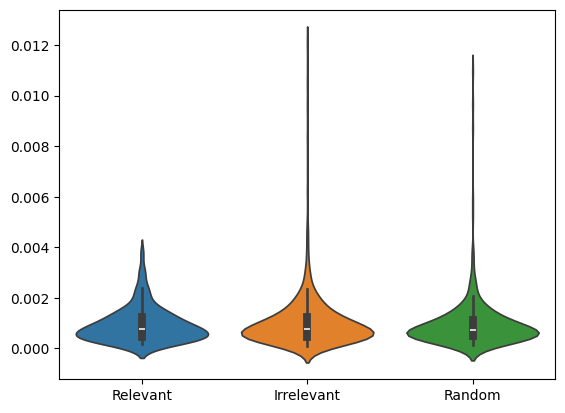

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.75256 | train_auc: 0.81883 | valid_auc: 0.81578 |  0:00:15s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 0.59545 | train_auc: 0.85164 | valid_auc: 0.84619 |  0:00:31s
epoch 2  | loss: 0.55989 | train_auc: 0.87809 | valid_auc: 0.87446 |  0:00:48s
epoch 3  | loss: 0.52652 | train_auc: 0.89401 | valid_auc: 0.88428 |  0:01:03s
epoch 4  | loss: 0.50962 | train_auc: 0.89964 | valid_auc: 0.8902  |  0:01:19s
epoch 5  | loss: 0.51062 | train_auc: 0.90378 | valid_auc: 0.88975 |  0:01:35s
epoch 6  | loss: 0.49577 | train_auc: 0.90433 | valid_auc: 0.89737 |  0:01:51s
epoch 7  | loss: 0.48129 | train_auc: 0.90612 | valid_auc: 0.89569 |  0:02:06s
epoch 8  | loss: 0.47533 | train_auc: 0.90759 | valid_auc: 0.89562 |  0:02:19s
epoch 9  | loss: 0.47086 | train_auc: 0.90691 | valid_auc: 0.90001 |  0:02:32s
epoch 10 | loss: 0.48406 | train_auc: 0.90695 | valid_auc: 0.89641 |  0:02:45s
epoch 11 | loss: 0.46909 | train_auc: 0.90778 | valid_auc: 0.89562 |  0:02:57s
epoch 12 | loss: 0.47933 | train_auc: 0.90744 | valid_auc: 0.89373 |  0:03:10s
epoch 13 | loss: 0.47389 | train_auc: 0.90795 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.12569635634463047
Average irrelevant feature importance: 0.45677335401946506
Average random feature importance: 0.010110305150503244
Relevant: [0.18611266 0.1221731  0.04361289 0.15088677]
Irrelevant: [0.45677335]
Random: [0.00557718 0.0178578  0.00337482 0.01363142]
Train AUC score: 0.9191264373482542
Validation AUC score: 0.9096459507190312
Test AUC score: 0.9172153635116598
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


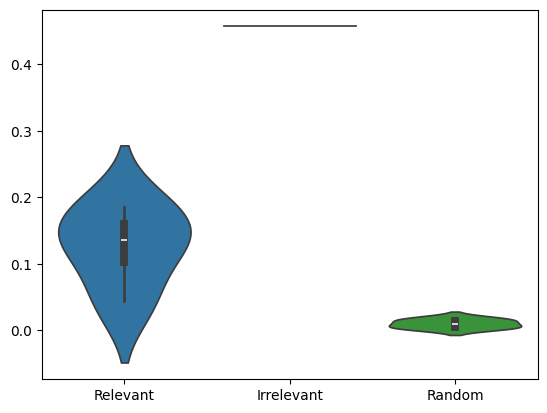

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant:", relevant)
print("Irrelevant:", irrelevant)
print("Random:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.89893 | train_auc: 0.52524 | valid_auc: 0.51083 |  0:00:14s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 0.83942 | train_auc: 0.55936 | valid_auc: 0.53529 |  0:00:28s
epoch 2  | loss: 0.77628 | train_auc: 0.61085 | valid_auc: 0.58315 |  0:00:42s
epoch 3  | loss: 0.72277 | train_auc: 0.66283 | valid_auc: 0.64501 |  0:00:56s
epoch 4  | loss: 0.68574 | train_auc: 0.72592 | valid_auc: 0.72672 |  0:01:11s
epoch 5  | loss: 0.67018 | train_auc: 0.75523 | valid_auc: 0.7434  |  0:01:25s
epoch 6  | loss: 0.64422 | train_auc: 0.78549 | valid_auc: 0.78743 |  0:01:39s
epoch 7  | loss: 0.62784 | train_auc: 0.8093  | valid_auc: 0.80561 |  0:01:53s
epoch 8  | loss: 0.61641 | train_auc: 0.81953 | valid_auc: 0.82824 |  0:02:08s
epoch 9  | loss: 0.60306 | train_auc: 0.83414 | valid_auc: 0.8169  |  0:02:22s
epoch 10 | loss: 0.59719 | train_auc: 0.83543 | valid_auc: 0.82333 |  0:02:36s
epoch 11 | loss: 0.56924 | train_auc: 0.8483  | valid_auc: 0.82911 |  0:02:50s
epoch 12 | loss: 0.56923 | train_auc: 0.86054 | valid_auc: 0.84926 |  0:03:04s
epoch 13 | loss: 0.57632 | train_auc: 0.86841 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.008161580024232801
Average irrelevant feature importance: 0.018723764955784056
Average random feature importance: 0.00028704754639510783
Relevant: [5.14819283e-05 7.05773854e-02 1.47560843e-04 1.23114969e-03
 2.17038268e-05 1.14894145e-06 3.62454430e-04 5.44248521e-05
 1.41736504e-02 2.91710038e-03 2.39319568e-04]
Irrelevant: [1.01001175e-05 6.42177981e-04 2.86742786e-08 2.06054581e-02
 3.51729285e-02 4.12597878e-06 1.54041226e-06 3.69084194e-02
 3.94746185e-07 2.39036197e-04 1.41458382e-07 7.90205798e-02
 2.70614750e-04 5.88094100e-05 1.68673094e-04 1.78873888e-02
 7.55659001e-02 4.37648972e-03 3.11329268e-05 6.19614653e-05
 2.38634805e-03 8.13033645e-05 1.20761115e-05 1.22647796e-04
 2.13669990e-04 4.05069712e-04 4.43414816e-05 7.45052151e-04
 1.97868258e-01 1.53318218e-02 2.62767570e-05 1.22627827e-01
 1.46454306e-04 7.67900602e-06 1.19900793e-05 3.78922004e-02
 8.22137894e-05 7.72868470e-02 7.38061959e-07 3.96714566e-05
 8.93884449e-05 5.07956

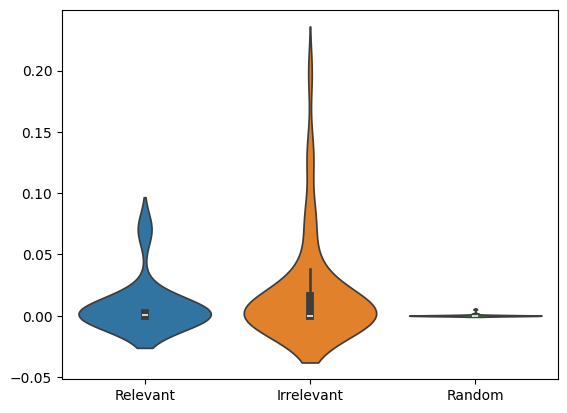

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant:", relevant)
print("Irrelevant:", irrelevant)
print("Random:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

### SAM; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

c:\Users\hberg\Documents\School\Spring 2024\DL\Final\DLCausalOptimization\Modified_TabNet\abstract_model.py:84: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.93776 | train_auc: 0.45766 | valid_auc: 0.38784 |  0:00:30s


C:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch 1  | loss: 0.91908 | train_auc: 0.44947 | valid_auc: 0.42422 |  0:01:02s
epoch 2  | loss: 0.88038 | train_auc: 0.47082 | valid_auc: 0.43661 |  0:01:33s
epoch 3  | loss: 0.86476 | train_auc: 0.48179 | valid_auc: 0.44526 |  0:02:03s
epoch 4  | loss: 0.84405 | train_auc: 0.48787 | valid_auc: 0.46574 |  0:02:34s
epoch 5  | loss: 0.82797 | train_auc: 0.48691 | valid_auc: 0.457   |  0:03:05s
epoch 6  | loss: 0.81942 | train_auc: 0.48792 | valid_auc: 0.49062 |  0:03:35s
epoch 7  | loss: 0.81076 | train_auc: 0.48232 | valid_auc: 0.4778  |  0:04:06s
epoch 8  | loss: 0.79631 | train_auc: 0.49922 | valid_auc: 0.51604 |  0:04:36s
epoch 9  | loss: 0.7927  | train_auc: 0.50102 | valid_auc: 0.49111 |  0:05:07s
epoch 10 | loss: 0.77196 | train_auc: 0.51271 | valid_auc: 0.52162 |  0:05:37s
epoch 11 | loss: 0.76165 | train_auc: 0.51304 | valid_auc: 0.49404 |  0:06:08s
epoch 12 | loss: 0.76435 | train_auc: 0.51227 | valid_auc: 0.51624 |  0:06:38s
epoch 13 | loss: 0.75337 | train_auc: 0.51606 | vali

KeyboardInterrupt: 

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SAM", "violin_plot_sam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sam_df = pd.concat([sam_df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
sam_df.to_csv(os.path.join("Results/SAM", "sam_data.csv"), index=False)

# Adam

In [ ]:
adam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### Adam; N = 50, p = 6, d = 4

In [ ]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 60, d = 40

In [ ]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 600, d = 400

In [ ]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 6, d = 4

In [ ]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 60, d = 40

In [ ]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 600, d = 400

In [ ]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 6, d = 4

In [ ]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 60, d = 40

In [ ]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 600, d = 400

In [ ]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
adam_df.to_csv(os.path.join("Results/Adam", "adam_data.csv"), index=False)